# PRAKTIKUM MORFOLOGI

**Nama  : Daffa Yudisa Akbar**

**Kelas : TI-3A / 06**

**NIM   : 2241720008**

---

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”. Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)

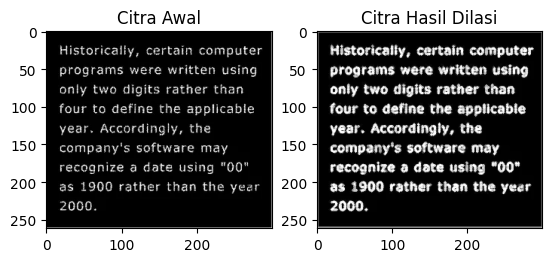

In [3]:
# Memuat gambar (diasumsikan gambar grayscale)
image_path = '/content/drive/MyDrive/PCVK/morphology.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')

# Mendefinisikan elemen struktural berbentuk cross 3x3 untuk dilasi
def create_cross_SE():
    SE = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)
    return SE

# Fungsi dilasi tanpa menggunakan fungsi morfologi bawaan OpenCV
def dilate(image, SE):
    # Mendapatkan dimensi gambar dan elemen struktural
    img_height, img_width = image.shape
    se_height, se_width = SE.shape
    pad_h = se_height // 2
    pad_w = se_width // 2

    # Membuat gambar dengan padding untuk menangani tepi gambar
    padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Membuat gambar kosong untuk menyimpan hasil dilasi
    dilated_img = np.zeros_like(image)

    # Melakukan operasi dilasi
    for i in range(img_height):
        for j in range(img_width):
            # Menyusun wilayah (region) dari gambar yang dipad berdasarkan elemen struktural
            region = padded_img[i:i+se_height, j:j+se_width]
            # Melakukan operasi dilasi (memilih nilai maksimum dari tetangga yang didefinisikan oleh SE)
            dilated_img[i, j] = np.max(region[SE == 1])

    return dilated_img

# Menerapkan dilasi
SE = create_cross_SE()
dilated_img = dilate(img, SE)

# Menampilkan gambar hasil dilasi
plt.subplot(1, 2, 2)
plt.title("Citra Hasil Dilasi")
plt.imshow(dilated_img, cmap='gray')
plt.show()


4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)


Structuring Element (Cross 3x3):
 [[0 1 0]
 [1 1 1]
 [0 1 0]]


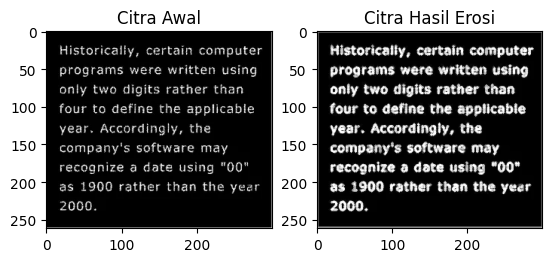

In [4]:
# Memuat gambar (grayscale)
image_path = '/content/drive/MyDrive/PCVK/morphology.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')

# Membuat Structuring Element Dilasi (SED) berbentuk cross 3x3
SE = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
print("Structuring Element (Cross 3x3):\n", SE)

# Menerapkan operasi dilasi
dilated_img = cv2.dilate(img, SE)

# Menampilkan gambar hasil dilasi
plt.subplot(1, 2, 2)
plt.title("Citra Hasil Erosi")
plt.imshow(dilated_img, cmap='gray')

plt.show()

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

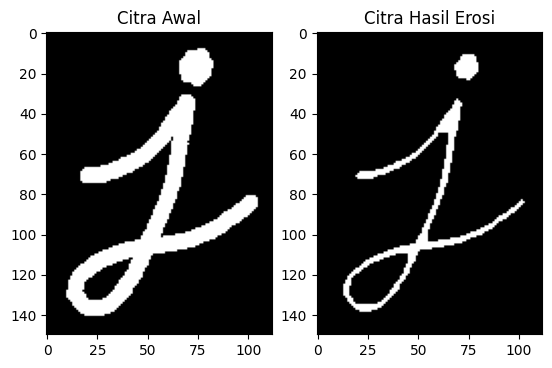

In [5]:
# Memuat gambar (grayscale)
image_path = '/content/drive/MyDrive/PCVK/j.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')

# Membuat Structuring Element Erosi (SE) berbentuk square 5x5
def create_square_SE():
    SE = np.ones((5, 5), dtype=np.uint8)  # Elemen struktural berupa square 5x5 (semua elemen 1)
    return SE

# Fungsi erosi tanpa menggunakan library morfologi dari OpenCV
def erode(image, SE):
    # Mendapatkan dimensi gambar dan elemen struktural
    img_height, img_width = image.shape
    se_height, se_width = SE.shape
    pad_h = se_height // 2
    pad_w = se_width // 2

    # Membuat gambar dengan padding untuk menangani tepi
    padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=255)

    # Membuat gambar kosong untuk menyimpan hasil erosi
    eroded_img = np.zeros_like(image)

    # Melakukan operasi erosi
    for i in range(img_height):
        for j in range(img_width):
            # Menyusun wilayah (region) dari gambar yang dipad berdasarkan elemen struktural
            region = padded_img[i:i+se_height, j:j+se_width]
            # Melakukan operasi erosi (mengambil nilai minimum dari tetangga yang didefinisikan oleh SE)
            eroded_img[i, j] = np.min(region[SE == 1])

    return eroded_img

# Menerapkan erosi
SE = create_square_SE()
eroded_img = erode(img, SE)

# Menampilkan gambar hasil erosi
plt.subplot(1, 2, 2)
plt.title("Citra Hasil Erosi")
plt.imshow(eroded_img, cmap='gray')

plt.show()

6.  Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

Structuring Element (Square 5x5):
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


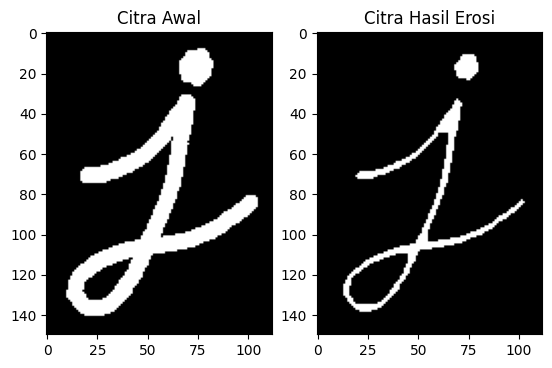

In [6]:
# Memuat gambar (grayscale)
image_path = '/content/drive/MyDrive/PCVK/j.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')

# Membuat Structuring Element Erosi (SE) berbentuk square 5x5
SE = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
print("Structuring Element (Square 5x5):\n", SE)

# Menerapkan operasi erosi
eroded_img = cv2.erode(img, SE)

# Menampilkan gambar hasil erosi
plt.subplot(1, 2, 2)
plt.title("Citra Hasil Erosi")
plt.imshow(eroded_img, cmap='gray')

plt.show()

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

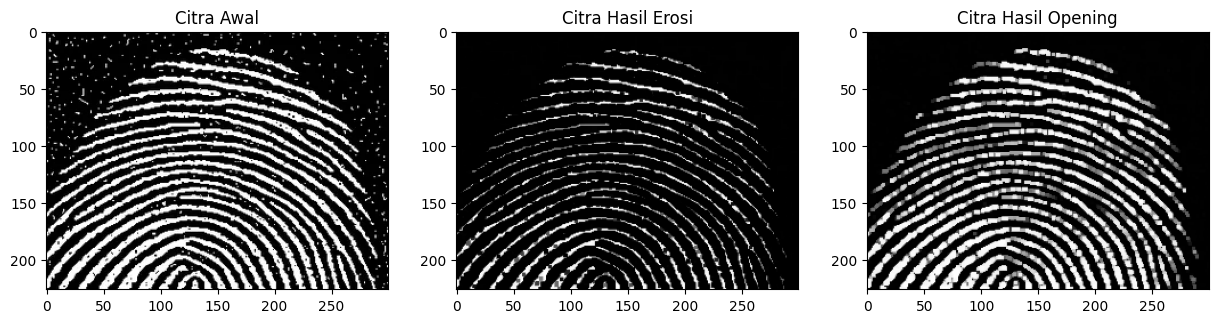

In [7]:
# Memuat gambar (grayscale)
image_path = '/content/drive/MyDrive/PCVK/fingerprint.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Menampilkan gambar asli
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')

# Membuat Structuring Element berbentuk square 3x3
def create_square_SE():
    SE = np.ones((3, 3), dtype=np.uint8)  # Elemen struktural square 3x3
    return SE

# Fungsi erosi tanpa OpenCV
def erode(image, SE):
    img_height, img_width = image.shape
    se_height, se_width = SE.shape
    pad_h = se_height // 2
    pad_w = se_width // 2

    # Padding untuk menangani tepi
    padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=255)

    # Gambar kosong untuk hasil erosi
    eroded_img = np.zeros_like(image)

    # Operasi erosi
    for i in range(img_height):
        for j in range(img_width):
            region = padded_img[i:i+se_height, j:j+se_width]
            eroded_img[i, j] = np.min(region[SE == 1])

    return eroded_img

# Fungsi dilasi tanpa OpenCV
def dilate(image, SE):
    img_height, img_width = image.shape
    se_height, se_width = SE.shape
    pad_h = se_height // 2
    pad_w = se_width // 2

    # Padding untuk menangani tepi
    padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Gambar kosong untuk hasil dilasi
    dilated_img = np.zeros_like(image)

    # Operasi dilasi
    for i in range(img_height):
        for j in range(img_width):
            region = padded_img[i:i+se_height, j:j+se_width]
            dilated_img[i, j] = np.max(region[SE == 1])

    return dilated_img

# Fungsi operasi opening tanpa OpenCV
def opening(image, SE):
    eroded_img = erode(image, SE)
    opened_img = dilate(eroded_img, SE)
    return eroded_img, opened_img

# Membuat elemen struktural square 3x3
SE = create_square_SE()

# Melakukan operasi erosi dan opening tanpa OpenCV
eroded_img_manual, opened_img_manual = opening(img, SE)

# Menampilkan gambar hasil erosi tanpa OpenCV
plt.subplot(1, 3, 2)
plt.title("Citra Hasil Erosi")
plt.imshow(eroded_img_manual, cmap='gray')

# Menampilkan gambar hasil opening tanpa OpenCV
plt.subplot(1, 3, 3)
plt.title("Citra Hasil Opening")
plt.imshow(opened_img_manual, cmap='gray')

# Menampilkan semua gambar
plt.show()

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

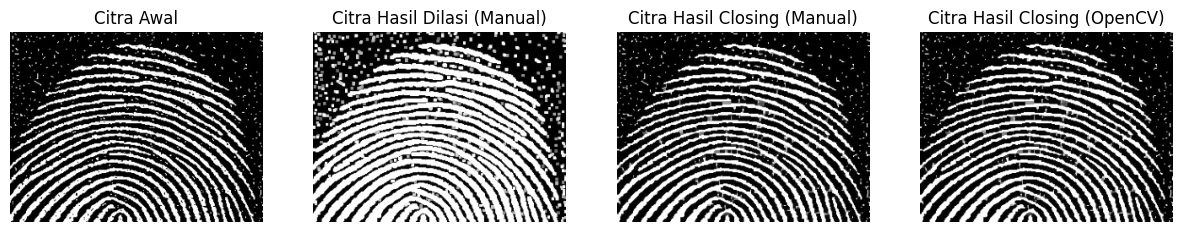

In [8]:
# Memuat gambar (grayscale)
image_path = '/content/drive/MyDrive/PCVK/fingerprint.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Memperbesar ukuran tampilan
plt.figure(figsize=(15, 5))  # Menyesuaikan ukuran tampilan (lebar, tinggi)

# Menampilkan gambar asli
plt.subplot(1, 4, 1)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')
plt.axis('off')

# Membuat Structuring Element berbentuk square 3x3
def create_square_SE():
    SE = np.ones((3, 3), dtype=np.uint8)  # Elemen struktural square 3x3
    return SE

# Fungsi dilasi tanpa OpenCV
def dilate(image, SE):
    img_height, img_width = image.shape
    se_height, se_width = SE.shape
    pad_h = se_height // 2
    pad_w = se_width // 2

    # Padding untuk menangani tepi
    padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Gambar kosong untuk hasil dilasi
    dilated_img = np.zeros_like(image)

    # Operasi dilasi
    for i in range(img_height):
        for j in range(img_width):
            region = padded_img[i:i + se_height, j:j + se_width]
            dilated_img[i, j] = np.max(region[SE == 1])

    return dilated_img

# Fungsi erosi tanpa OpenCV
def erode(image, SE):
    img_height, img_width = image.shape
    se_height, se_width = SE.shape
    pad_h = se_height // 2
    pad_w = se_width // 2

    # Padding untuk menangani tepi
    padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=255)

    # Gambar kosong untuk hasil erosi
    eroded_img = np.zeros_like(image)

    # Operasi erosi
    for i in range(img_height):
        for j in range(img_width):
            region = padded_img[i:i + se_height, j:j + se_width]
            eroded_img[i, j] = np.min(region[SE == 1])

    return eroded_img

# Fungsi operasi closing tanpa OpenCV
def closing(image, SE):
    dilated_img = dilate(image, SE)
    closed_img = erode(dilated_img, SE)
    return dilated_img, closed_img

# Membuat elemen struktural square 3x3
SE = create_square_SE()

# Melakukan operasi dilasi dan closing tanpa OpenCV
dilated_img_manual, closed_img_manual = closing(img, SE)

# Menampilkan gambar hasil dilasi
plt.subplot(1, 4, 2)
plt.title("Citra Hasil Dilasi (Manual)")
plt.imshow(dilated_img_manual, cmap='gray')
plt.axis('off')

# Menampilkan gambar hasil closing
plt.subplot(1, 4, 3)
plt.title("Citra Hasil Closing (Manual)")
plt.imshow(closed_img_manual, cmap='gray')
plt.axis('off')

# Implementasi closing dengan OpenCV
SE_cv = create_square_SE()  # Membuat structuring element
closed_img_cv = cv2.morphologyEx(img, cv2.MORPH_CLOSE, SE_cv)

# Menampilkan citra hasil closing dengan OpenCV
plt.subplot(1, 4, 4)
plt.title("Citra Hasil Closing (OpenCV)")
plt.imshow(closed_img_cv, cmap='gray')
plt.axis('off')

# Menampilkan semua gambar
plt.show()


9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

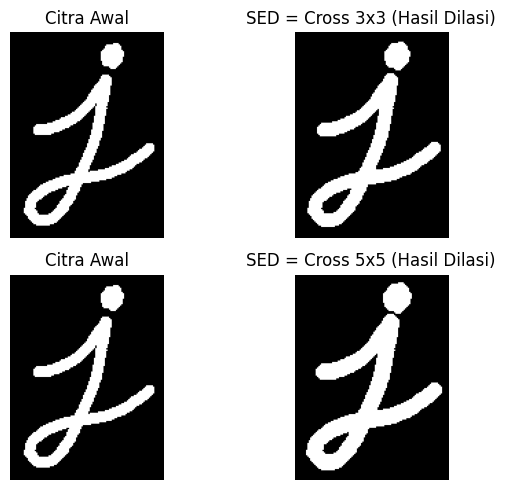

In [9]:
# Memuat gambar (grayscale)
image_path = '/content/drive/MyDrive/PCVK/j.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element berbentuk Cross 3x3
def create_cross_SE_3x3():
    SE = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)
    return SE

# Membuat Structuring Element berbentuk Cross 5x5
def create_cross_SE_5x5():
    SE = np.array([[0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [1, 1, 1, 1, 1],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0]], dtype=np.uint8)
    return SE

# Fungsi dilasi menggunakan OpenCV
def dilate_with_opencv(image, SE):
    dilated_img = cv2.dilate(image, SE)
    return dilated_img

# Membuat structuring elements
SE_3x3 = create_cross_SE_3x3()
SE_5x5 = create_cross_SE_5x5()

# Melakukan operasi dilasi dengan structuring elements
dilated_img_3x3 = dilate_with_opencv(img, SE_3x3)
dilated_img_5x5 = dilate_with_opencv(img, SE_5x5)

# Memperbesar ukuran tampilan
plt.figure(figsize=(7, 5))  # Menyesuaikan ukuran tampilan (lebar, tinggi)

# Baris 1: Citra Awal dan SED = Cross 3x3
plt.subplot(2, 2, 1)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("SED = Cross 3x3 (Hasil Dilasi)")
plt.imshow(dilated_img_3x3, cmap='gray')
plt.axis('off')

# Baris 2: Citra Awal dan SED = Cross 5x5
plt.subplot(2, 2, 3)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("SED = Cross 5x5 (Hasil Dilasi)")
plt.imshow(dilated_img_5x5, cmap='gray')
plt.axis('off')

# Menampilkan semua gambar
plt.tight_layout()
plt.show()


10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

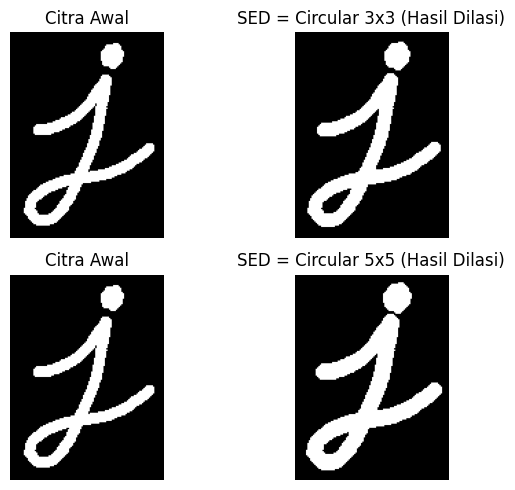

In [10]:
# Memuat gambar (grayscale)
image_path = '/content/drive/MyDrive/PCVK/j.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element berbentuk Circular 3x3
def create_circular_SE_3x3():
    radius = 1  # Jari-jari untuk 3x3
    SE = np.zeros((3, 3), dtype=np.uint8)
    for i in range(3):
        for j in range(3):
            if (i - 1) ** 2 + (j - 1) ** 2 <= radius ** 2:
                SE[i, j] = 1
    return SE

# Membuat Structuring Element berbentuk Circular 5x5
def create_circular_SE_5x5():
    radius = 2  # Jari-jari untuk 5x5
    SE = np.zeros((5, 5), dtype=np.uint8)
    for i in range(5):
        for j in range(5):
            if (i - 2) ** 2 + (j - 2) ** 2 <= radius ** 2:
                SE[i, j] = 1
    return SE

# Fungsi dilasi menggunakan OpenCV
def dilate_with_opencv(image, SE):
    dilated_img = cv2.dilate(image, SE)
    return dilated_img

# Membuat structuring elements
SE_circular_3x3 = create_circular_SE_3x3()
SE_circular_5x5 = create_circular_SE_5x5()

# Melakukan operasi dilasi dengan structuring elements
dilated_img_circular_3x3 = dilate_with_opencv(img, SE_circular_3x3)
dilated_img_circular_5x5 = dilate_with_opencv(img, SE_circular_5x5)

# Memperbesar ukuran tampilan
plt.figure(figsize=(7, 5))  # Menyesuaikan ukuran tampilan (lebar, tinggi)

# Baris 1: Citra Awal dan SED = Circular 3x3
plt.subplot(2, 2, 1)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("SED = Circular 3x3 (Hasil Dilasi)")
plt.imshow(dilated_img_circular_3x3, cmap='gray')
plt.axis('off')

# Baris 2: Citra Awal dan SED = Circular 5x5
plt.subplot(2, 2, 3)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("SED = Circular 5x5 (Hasil Dilasi)")
plt.imshow(dilated_img_circular_5x5, cmap='gray')
plt.axis('off')

# Menampilkan semua gambar
plt.tight_layout()
plt.show()

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

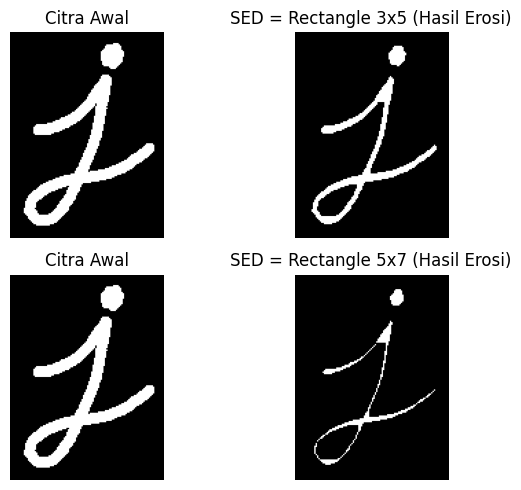

In [11]:
# Memuat gambar (grayscale)
image_path = '/content/drive/MyDrive/PCVK/j.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element berbentuk Rectangle 3x5
def create_rectangle_SE_3x5():
    SE = np.ones((3, 5), dtype=np.uint8)  # Elemen struktural rectangle 3x5
    return SE

# Membuat Structuring Element berbentuk Rectangle 5x7
def create_rectangle_SE_5x7():
    SE = np.ones((5, 7), dtype=np.uint8)  # Elemen struktural rectangle 5x7
    return SE

# Fungsi erosi menggunakan OpenCV
def erode_with_opencv(image, SE):
    eroded_img = cv2.erode(image, SE)
    return eroded_img

# Membuat structuring elements
SE_rectangle_3x5 = create_rectangle_SE_3x5()
SE_rectangle_5x7 = create_rectangle_SE_5x7()

# Melakukan operasi erosi dengan structuring elements
eroded_img_rectangle_3x5 = erode_with_opencv(img, SE_rectangle_3x5)
eroded_img_rectangle_5x7 = erode_with_opencv(img, SE_rectangle_5x7)

# Memperbesar ukuran tampilan
plt.figure(figsize=(7, 5))  # Menyesuaikan ukuran tampilan (lebar, tinggi)

# Baris 1: Citra Awal dan SED = Rectangle 3x5
plt.subplot(2, 2, 1)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("SED = Rectangle 3x5 (Hasil Erosi)")
plt.imshow(eroded_img_rectangle_3x5, cmap='gray')
plt.axis('off')

# Baris 2: Citra Awal dan SED = Rectangle 5x7
plt.subplot(2, 2, 3)
plt.title("Citra Awal")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("SED = Rectangle 5x7 (Hasil Erosi)")
plt.imshow(eroded_img_rectangle_5x7, cmap='gray')
plt.axis('off')

# Menampilkan semua gambar
plt.tight_layout()
plt.show()


12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

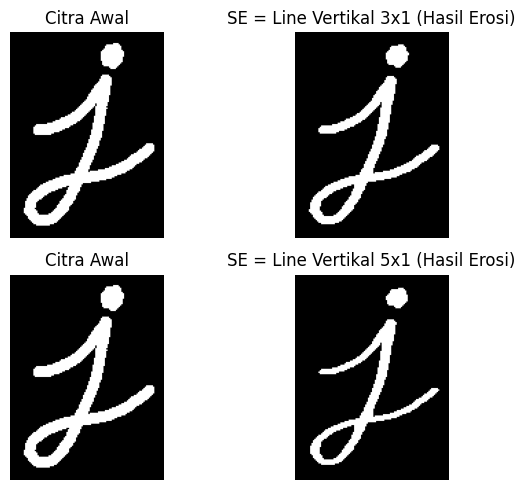

In [12]:
# Memuat gambar (grayscale)
image_path = '/content/drive/MyDrive/PCVK/j.png'
image  = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Membuat structuring element (elemen struktur) berbentuk garis vertikal
kernel_3 = np.ones((3, 1), np.uint8)  # Elemen struktur 3x1
kernel_5 = np.ones((5, 1), np.uint8)  # Elemen struktur 5x1

# Menerapkan operasi erosi
erosion_3 = cv2.erode(image, kernel_3)
erosion_5 = cv2.erode(image, kernel_5)

# Menampilkan gambar asli dan hasil erosi
plt.figure(figsize=(7, 5))  # Menyesuaikan ukuran tampilan (lebar, tinggi)

# Baris 1: Gambar Asli dan Erosi dengan Kernel 3x1
plt.subplot(2, 2, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('SE = Line Vertikal 3x1 (Hasil Erosi)')
plt.imshow(erosion_3, cmap='gray')
plt.axis('off')

# Baris 2: Gambar Asli dan Erosi dengan Kernel 5x1
plt.subplot(2, 2, 3)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('SE = Line Vertikal 5x1 (Hasil Erosi)')
plt.imshow(erosion_5, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
